# Assignment 3


Load 'tips' dataset from seaborn library with .load_dataset('tips')

1. check info about dataset using .info()
2. check statistical measures using .describe(). Write explanation about each value in notebook as comments.
3. Plot histogram for each column, find out kind of skewness.
4. What are the different ways to reduce skewness? Implement any one method and plot histogram
5. Generate covariance matrix, correlation matrix and heatmap for the dataset. Explain all values present in matrix in jupyter notebook.
6. Plot cumulative frequency polygon for 'total bill' column and find out median value from graph
7. Find unique values and their value counts for each column.
8. Find out if there are any null records in data.
9. How to replace null records?
10. Drop unnecessary columns from the data.

In [29]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
data = sns.load_dataset("tips")
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [32]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


1. Mean is average of the Column.
2. Standard Deviation is measure of how spread out the values are.
3. Variance is square of Standard Deviation.
4. min is the Minimum Value.
5. 25% is the 1st Quartile (Q1).
6. 50% is the 2nd Quartile (Q2).
7. 75% is the 3rd Quartile (Q3).
8. max is the Maximum Value.

array([[<Axes: title={'center': 'total_bill'}>,
        <Axes: title={'center': 'tip'}>],
       [<Axes: title={'center': 'size'}>, <Axes: >]], dtype=object)

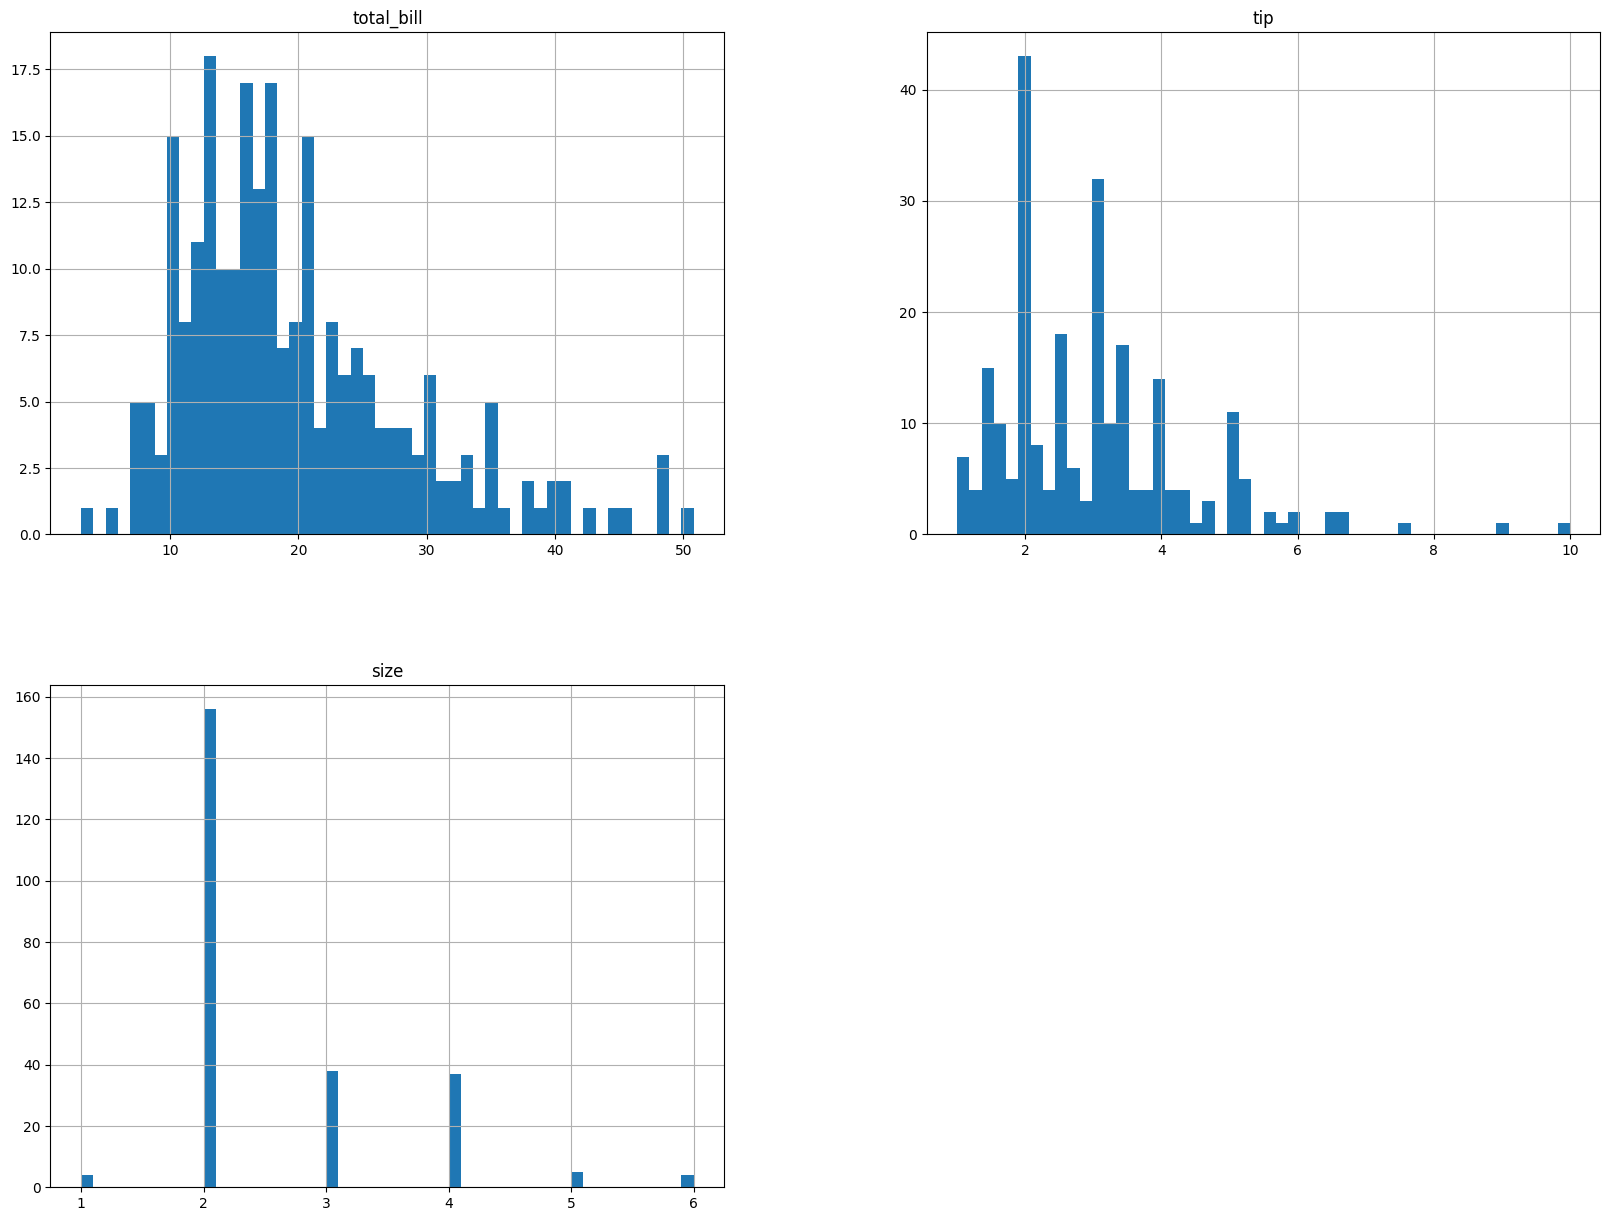

In [33]:
data.hist(bins=50, figsize=(20, 15))

In [34]:
def skew(data):
    mean = np.mean(data)
    std_dev = np.std(data, ddof=0)

    n = len(data)
    skewness = (n / ((n - 1) * (n - 2))) * np.sum(((data - mean) / std_dev) ** 3)
    return skewness

In [35]:
skew(data["total_bill"])

np.float64(1.140215371543316)

In [36]:
skew(data["tip"])

np.float64(1.4745063313590643)

In [37]:
skew(data["size"])

np.float64(1.4568282677492224)

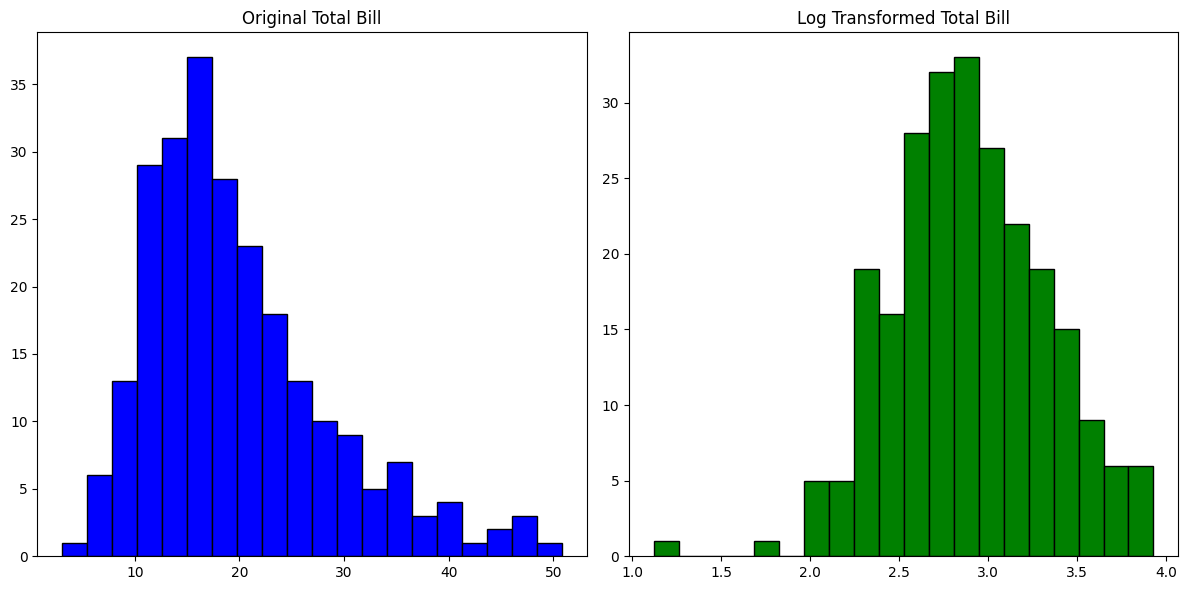

In [38]:
log_total_bill = np.log(data["total_bill"])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data["total_bill"], bins=20, color="blue", edgecolor="black")
plt.title("Original Total Bill")

plt.subplot(1, 2, 2)
plt.hist(log_total_bill, bins=20, color="green", edgecolor="black")
plt.title("Log Transformed Total Bill")

plt.tight_layout()
plt.show()

In [39]:
cov_matrix = data.select_dtypes(include=['number']).cov()
cov_matrix

,total_bill,tip,size
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size,5.065983,0.643906,0.904591


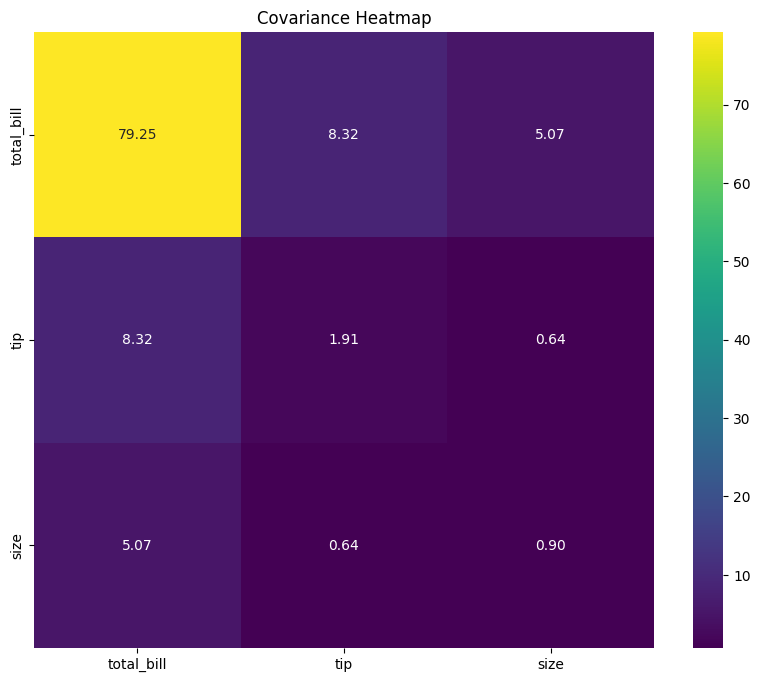

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.title("Covariance Heatmap")
plt.show()

In [41]:
corr_matrix = data.select_dtypes(include=[np.number]).corr()
corr_matrix

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


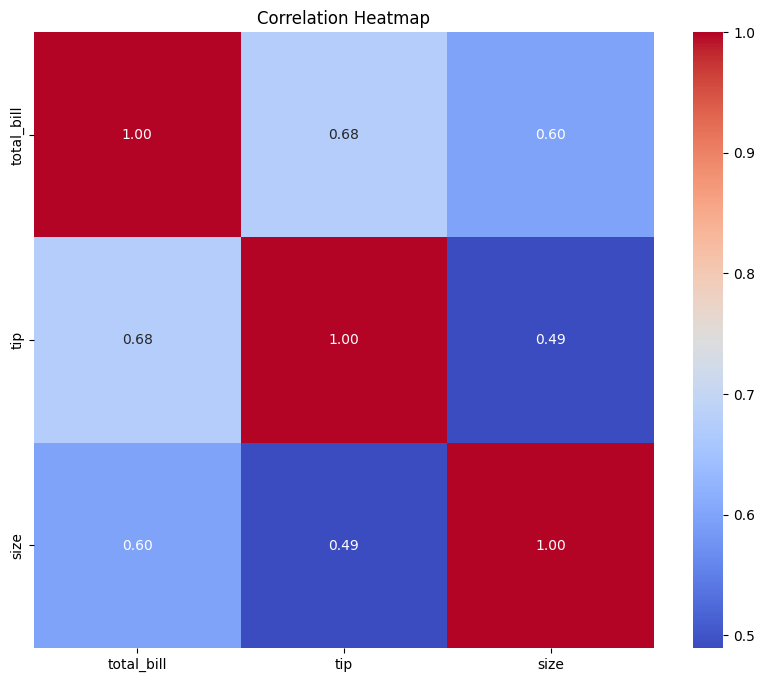

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Covariance Matrix: Measures the variability between pairs of columns. Positive values indicate that the columns increase together, while negative values indicate an inverse relationship.

Correlation Matrix: Measures the strength and direction of the linear relationship between pairs of columns. Values range from -1 to 1. A value of 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no linear relationship.

Heatmap: Visual representation of the correlation matrix, where colors indicate the strength of the correlations.

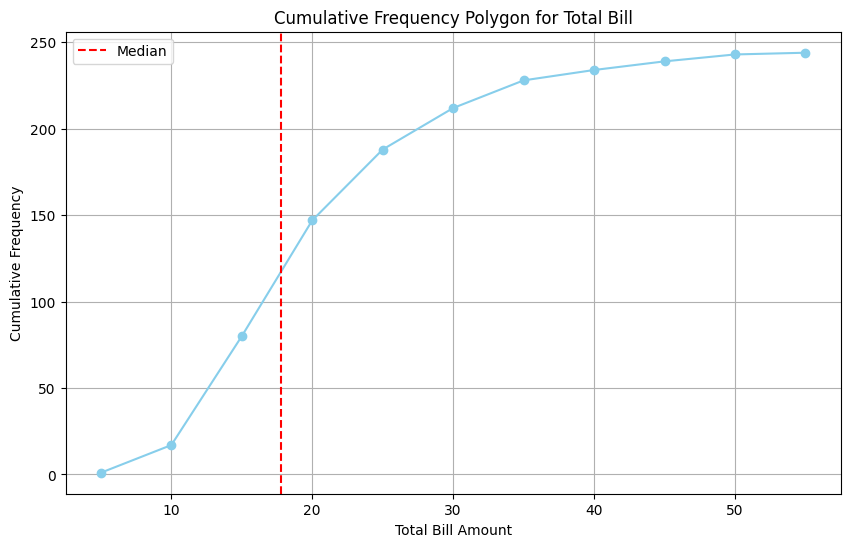

In [43]:
bins = np.arange(0, data["total_bill"].max() + 5, 5)
freq, _ = np.histogram(data["total_bill"], bins=bins)
cumulative_freq = np.cumsum(freq)

plt.figure(figsize=(10, 6))
plt.plot(bins[1:], cumulative_freq, marker="o", linestyle="-", color="skyblue")
plt.title("Cumulative Frequency Polygon for Total Bill")
plt.xlabel("Total Bill Amount")
plt.ylabel("Cumulative Frequency")
plt.grid()
plt.axvline(x=np.median(data['total_bill']), color='r', linestyle='--', label='Median')
plt.legend()
plt.show()

In [44]:
unique_counts = {col: data[col].value_counts() for col in data.columns}
unique_counts

{'total_bill': total_bill
 13.42    3
 21.01    2
 20.69    2
 10.33    2
 10.34    2
         ..
 29.03    1
 27.18    1
 22.67    1
 17.82    1
 18.78    1
 Name: count, Length: 229, dtype: int64,
 'tip': tip
 2.00    33
 3.00    23
 4.00    12
 2.50    10
 5.00    10
         ..
 1.47     1
 1.17     1
 4.67     1
 5.92     1
 1.75     1
 Name: count, Length: 123, dtype: int64,
 'sex': sex
 Male      157
 Female     87
 Name: count, dtype: int64,
 'smoker': smoker
 No     151
 Yes     93
 Name: count, dtype: int64,
 'day': day
 Sat     87
 Sun     76
 Thur    62
 Fri     19
 Name: count, dtype: int64,
 'time': time
 Dinner    176
 Lunch      68
 Name: count, dtype: int64,
 'size': size
 2    156
 3     38
 4     37
 5      5
 1      4
 6      4
 Name: count, dtype: int64}

In [45]:
null_records = data.isnull().sum()
null_records

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [46]:
# Fill Null records
data.fillna(method="ffill", inplace=True)

C:\Users\pokem\AppData\Local\Temp\ipykernel_408\2270776258.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method="ffill", inplace=True)


In [47]:
data.drop(columns=["smoker"], inplace=True)
data

,total_bill,tip,sex,day,time,size
0,16.99,1.01,Female,Sun,Dinner,2
1,10.34,1.66,Male,Sun,Dinner,3
2,21.01,3.50,Male,Sun,Dinner,3
3,23.68,3.31,Male,Sun,Dinner,2
4,24.59,3.61,Female,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,Male,Sat,Dinner,3
240,27.18,2.00,Female,Sat,Dinner,2
241,22.67,2.00,Male,Sat,Dinner,2
242,17.82,1.75,Male,Sat,Dinner,2


1. Find out count of unique records in each column.
2. Find if any outliers in data.
3. Plot heatmap of correlation matrix and covariance matrix for the given dataset.
4. Remove unnecessary or empty columns as well as any rows if required from the dataset.
5. Plot histograms for each column and remove any skewness using transformations.
6. Plot Yearly records for numerical columns (e.g. runs, trophies)

In [48]:
matches = pd.read_csv("matches.csv")

In [49]:
# 1. Find out Count of Unqiue records in each column
matches.nunique()

id                 1095
season               17
city                 36
date                823
match_type            8
player_of_match     291
venue                58
team1                19
team2                19
toss_winner          19
toss_decision         2
winner               19
result                4
result_margin        98
target_runs         170
target_overs         15
super_over            2
method                1
umpire1              62
umpire2              62
dtype: int64

In [50]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [51]:
# 2. Find if any outliers in data.
numerical_columns = matches.select_dtypes(include=['number']).columns
for col in numerical_columns:
    outliers = detect_outliers_iqr(matches, col)
    print(f"Outliers in column {col}: {len(outliers)}")

Outliers in column id: 0
Outliers in column result_margin: 121
Outliers in column target_runs: 30
Outliers in column target_overs: 30


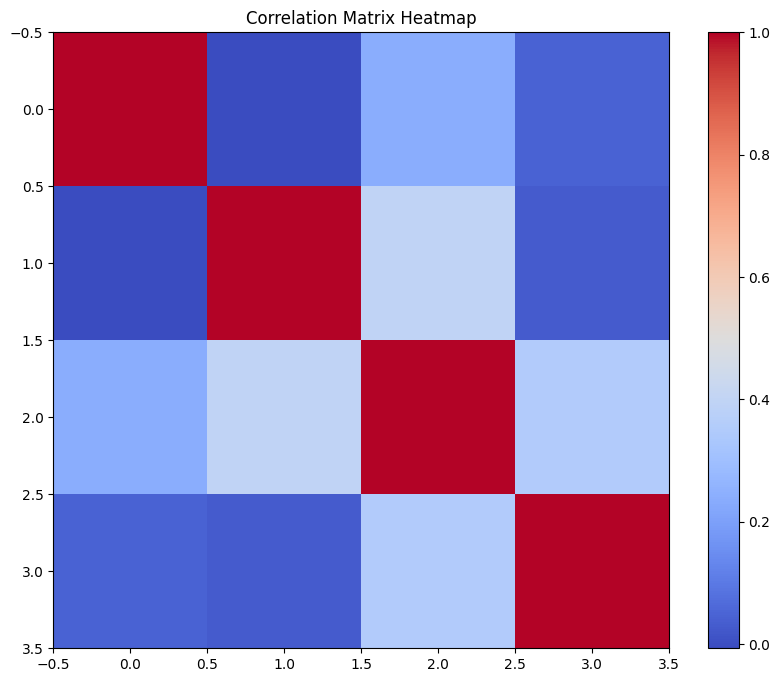

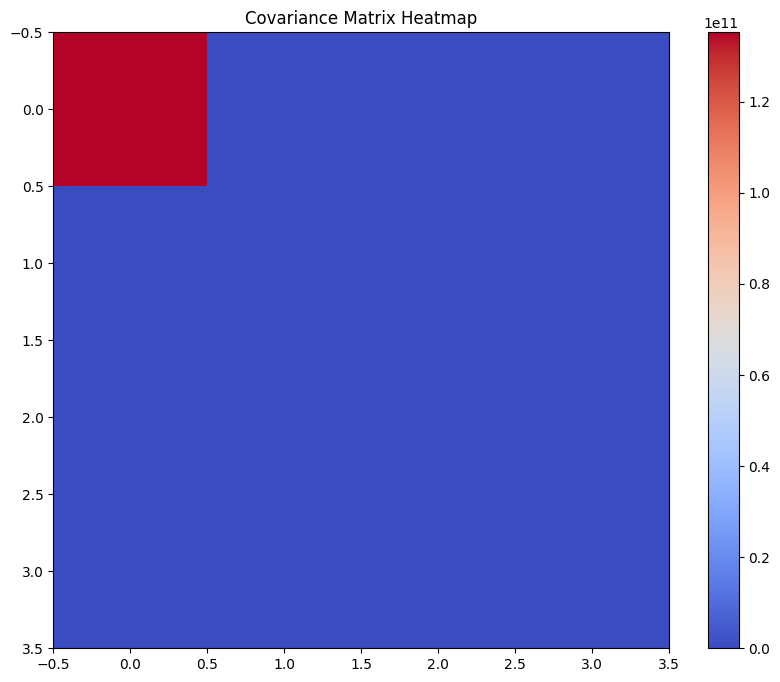

In [52]:
# 3. Plot heatmap of correlation matrix and covariance matrix for the given dataset.
corr_matrix = matches.select_dtypes(include=[np.number]).corr()
cov_matrix = matches.select_dtypes(include=[np.number]).cov()

# Plot heatmap for correlation
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap="coolwarm", interpolation="none")
plt.colorbar()
plt.title("Correlation Matrix Heatmap")
plt.show()

# Plot heatmap for covariance
plt.figure(figsize=(10, 8))
plt.imshow(cov_matrix, cmap="coolwarm", interpolation="none")
plt.colorbar()
plt.title("Covariance Matrix Heatmap")
plt.show()

In [53]:
# 4. Remove unnecessary or empty columns as well as any rows if required from the dataset.
columns_to_drop = [col for col in matches.columns if matches[col].isnull().sum() / len(matches) > 0.9]
matches_cleaned = matches.drop(columns=columns_to_drop)

matches_cleaned = matches_cleaned.dropna()

print("Removed columns:", columns_to_drop)
print("Remaining dataset shape:", matches.shape)

Removed columns: ['method']
Remaining dataset shape: (1095, 20)


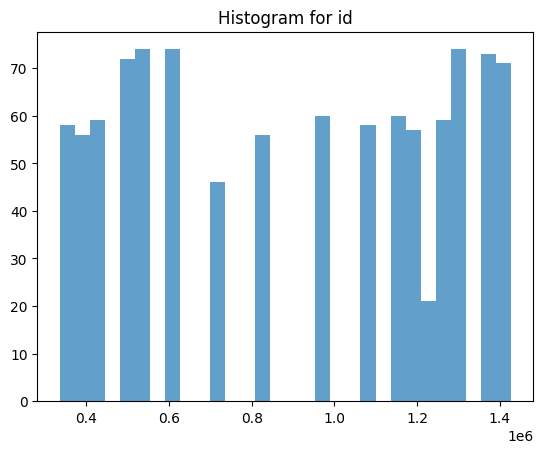

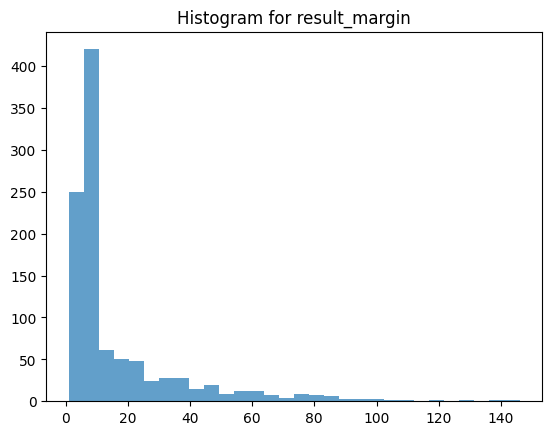

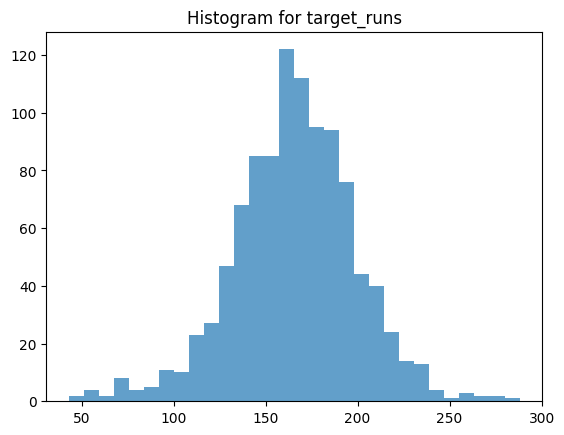

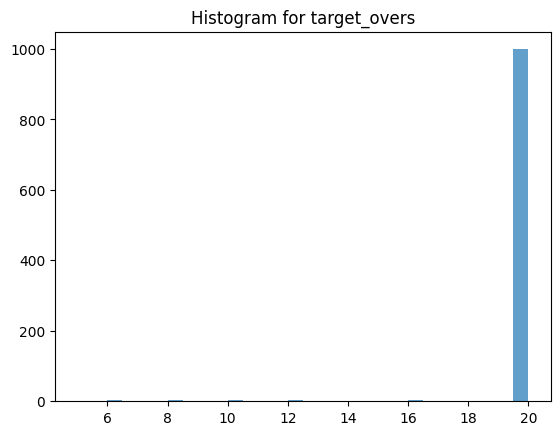

In [54]:
# 5. Plot histograms for each column and remove any skewness using transformations.
for col in numerical_columns:
    plt.hist(matches_cleaned[col].dropna(), bins=30, alpha=0.7)
    plt.title(f"Histogram for {col}")
    plt.show()

for col in numerical_columns:
    if (matches_cleaned[col] > 0).all():  # Log transform requires positive values
        matches_cleaned[col] = np.log1p(matches_cleaned[col])

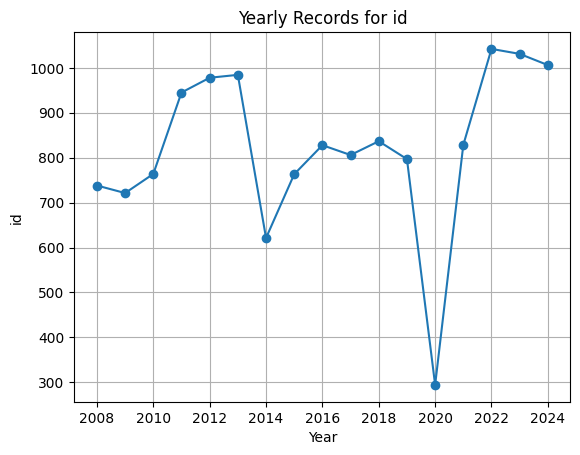

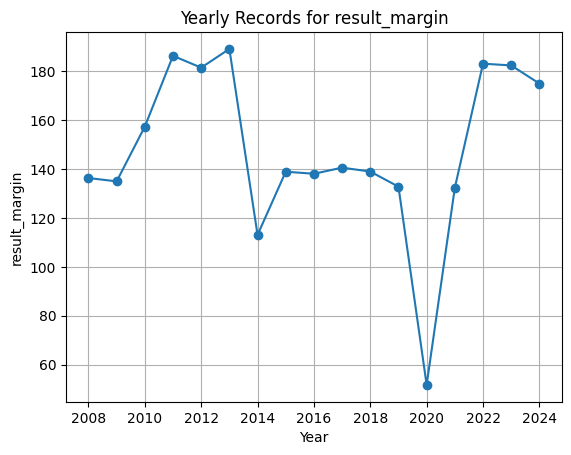

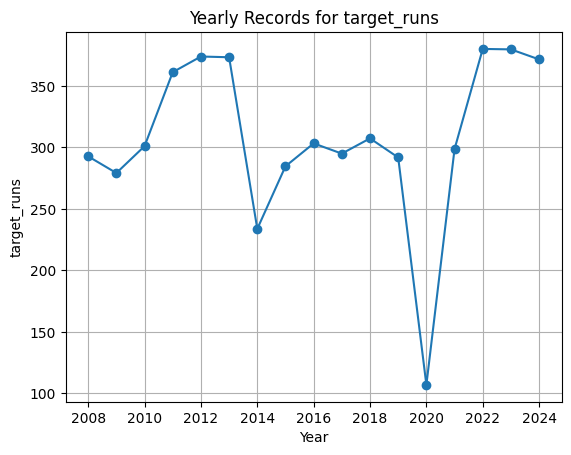

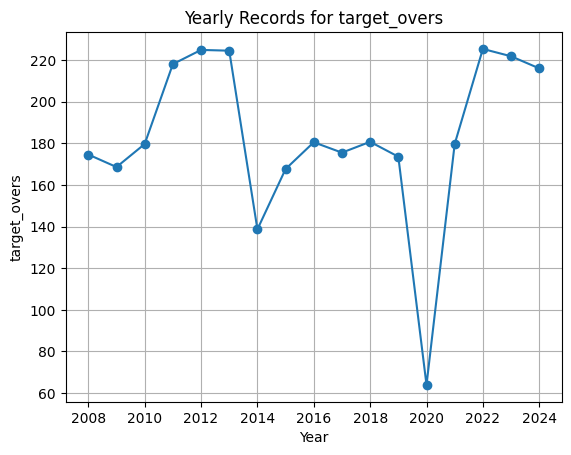

In [55]:
# 6. Plot Yearly records for numerical columns (e.g. runs, trophies)
matches_cleaned["date"] = pd.to_datetime(matches_cleaned["date"])
matches_cleaned["year"] = matches_cleaned["date"].dt.year

for col in numerical_columns:
    yearly_data = matches_cleaned.groupby("year")[col].sum()
    plt.plot(yearly_data.index, yearly_data.values, marker="o")
    plt.title(f"Yearly Records for {col}")
    plt.xlabel("Year")
    plt.ylabel(col)
    plt.grid()
    plt.show()